#### Libraries

In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

#### Load Data

The file Data/truck-profits.txt contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss.

In [2]:
data = np.loadtxt(os.path.join('Data', 'truck-profits.txt'), delimiter=',')

In [3]:
X, y = data[:, 0], data[:, 1]
m = X.size

print(f"X: {X.shape}", f"y: {y.shape}", sep='\n')

X: (97,)
y: (97,)


#### Plot Data

In [4]:
def plotData(X, y):
    if X.ndim == 2:
        X = X[:, 1]
        
    plt.figure(figsize=(12, 6))
    plt.plot(X, y, 'ro')
    
    plt.title("The profit of food truck w.r.t the population of the city")
    plt.xlabel("Population (in 10,000s)")
    plt.ylabel("Profit (in $10,000s)")

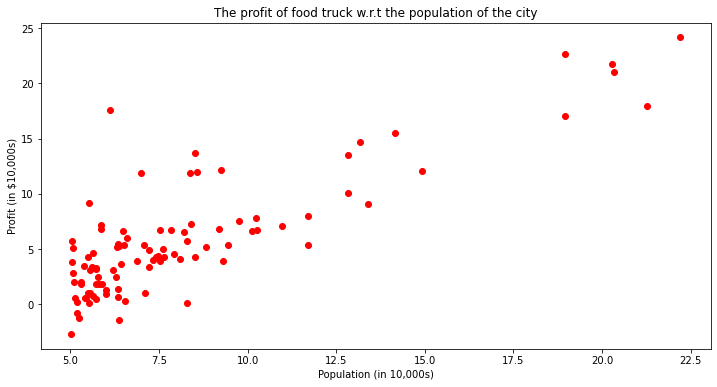

In [5]:
plotData(X, y)

#### Useful Functions

In [6]:
def computeCost(X, y, theta):
    if X.ndim == 1:
        X = X.reshape((1, -1))
    
    m = y.size
    J = np.sum((X@theta - y)**2) / (2*m)
    return J

In [7]:
def minBatGradientDescent(X, y, theta, alpha, iters=100, step=10):
    # useful variables
    m = y.size
    theta = theta.copy()
    
    # keep track of cost
    J_history = []

    for a in range(iters): # until cost converges
        for i in range(0, m, step): # loop over 10 (step) examples
            # compute start and end indices
            start = i
            end = start + step if (start+step) < m else None
            
            # index out data
            x = X[start:end, :]
            y_red = y[start:end] # y values for x
            
            # adjust theta
            theta = theta - (alpha/m) * x.T@(x@theta - y_red)
        
        # record cost
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

#### Train Model

In [9]:
# --- RUN ONLY ONCE ---
# add col of 1s
X = np.concatenate((np.ones((m, 1)), X.reshape(-1, 1)), axis=1)

In [10]:
# gradient descent params
alpha = 0.03
iters = 600

# initialize theta
theta = np.zeros(2)

# run gradient descent
theta, J_history = minBatGradientDescent(X, y, theta, alpha, iters)

#### Plot Best Fit

<Figure size 864x432 with 0 Axes>

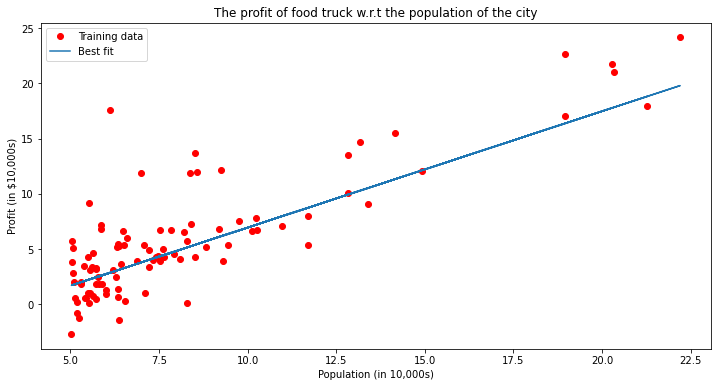

In [11]:
plt.figure(figsize=(12, 6))
plotData(X, y)
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.legend(['Training data', 'Best fit'])

pass

#### Plot Gradient Descent

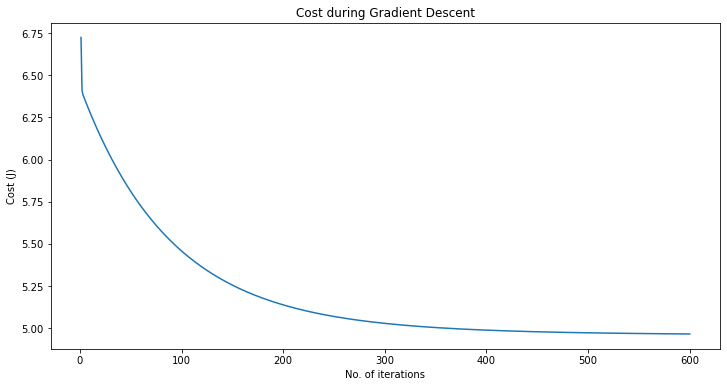

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, iters+1), J_history, '-')
plt.title("Cost during Gradient Descent")
plt.xlabel("No. of iterations")
plt.ylabel(f"Cost (J)")

pass